In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def dot_plot_matrix(S1,S2,plotdpm=False):
    dpm = np.zeros((len(S2),len(S1)))
    for i in range(len(S2)):
        for j in range(len(S1)):
            if S2[i] == S1[j]:
                dpm[i][j]=1
    if plotdpm:
        plt.spy(dpm,markersize=3)
        plt.xticks(range(len(S1)))
        plt.xlabel("Sequence1")
        plt.yticks(range(len(S2)))
        plt.ylabel("Sequence2")
        plt.show()
    return dpm

In [3]:
def subarr(arr):
    retarr=[]
    S=[]
    s=0
    for i in range(len(arr)-1):
        if arr[i]==arr[i+1]-1:
            s+=1
        else:
            retarr.append(arr[i-s:i+1])
            s=0    
        if i==len(arr)-2:
            if arr[len(arr)-1] == arr[len(arr)-2]+1:
                retarr.append(arr[i-s+1:i+2])
            else:
                retarr.append(arr[i-s:i+1])
    S = [i for i in retarr if len(i)!=1]
    return S

In [4]:
def original_index(Matrix,index_of_diagonal):
    if index_of_diagonal<0:
        tiR=abs(index_of_diagonal)
        tiC = 0
        
    else:
        tiR = 0
        tiC = index_of_diagonal
    A=[]
    Done=True
    while Done:
        if tiR<len(Matrix) and tiC<len(Matrix[0]):
            temp = [tiR,tiC]
            A.append(temp)
            tiR+=1
            tiC+=1
        else:
            Done=False    
    return A

In [5]:
def subseq(dpm,seq1,seq2):
    cdpm=np.copy(dpm)
    retS=[]
    t=[]
    for i in range(-len(dpm)+1,len(dpm[0])):
        curr_dia = dpm.diagonal(i)
        sa = subarr(np.where(np.array(curr_dia)==1)[0])
        for j in sa:
            diag_original_index = original_index(dpm,i)
            seqRet=""
            for k in j:
                seqRet+=str(seq2[diag_original_index[k][0]])
            retS.append(seqRet)
                
    return retS                

In [6]:
def printSeq(seqs):
    curr_max=max(seqs,key=len)
    while True:
        if len(seqs)!=1:
            print(curr_max)
            seqs.remove(curr_max)
            curr_max = max(seqs,key=len)
        elif len(seqs)==1:
            print(curr_max)
            break

In [7]:
def removeHypen(seq):
    rseq=''
    for i in seq:
        if i!='-':
            rseq+=i
    return rseq

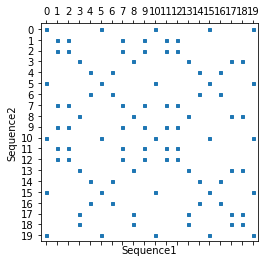


Diagonal:
ACCTGAGCTCACCTGAGTTA
ACCTGAG
ACCTGAG
CT
CT
CT
CT

Reverse Diagonal:
TGAGT
TGAG
GAGT
CAC
CTC
GAG
TT
CC
TC
CT
CC
CC
CT
TC
AC
CA
CC


In [8]:
S1 = "ACCTGAGCTCACCTGAGTTA"
S2 = "ACCTGAGCTCACCTGAGTTA"
S1 = removeHypen(S1)
S2 = removeHypen(S2)
dpm=dot_plot_matrix(S1,S2,True)
sequences1=[]
sequences1.append(subseq(dpm,S1,S2))#First array consists of sequence created using diagonal and sub diagonal

rev_dpm = dot_plot_matrix(S1[::-1],S2)
sequences1.append(subseq(rev_dpm,S1[::-1],S2))
#Second array consists of sequence created using reverse diagonal but not complimented

print("\nDiagonal:")
printSeq(sequences1[0])
print("\nReverse Diagonal:")
printSeq(sequences1[1])

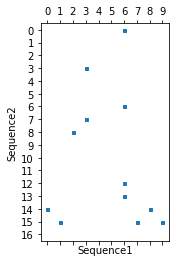


Diagonal:
HG
HG

Reverse Diagonal:
HG
AS


In [9]:
S1 = "HGSAQVKGHG"
S2 = "KTEAEMKASEDLKKHGT"
dpm2=dot_plot_matrix(S1,S2,True)
sequences2=[]
sequences2.append(subseq(dpm2,S1,S2))#First array consists of sequence created using diagonal and sub diagonal

rev_dpm2 = dot_plot_matrix(S1[::-1],S2)
sequences2.append(subseq(rev_dpm2,S1[::-1],S2))
#Second array consists of sequence created using reverse diagonal but not complimented
print("\nDiagonal:")
printSeq(sequences2[0])
print("\nReverse Diagonal:")
printSeq(sequences2[1])

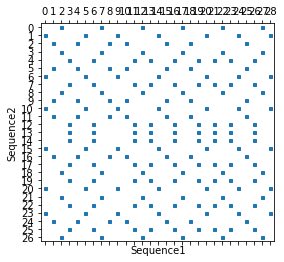


Diagonal:
CGATGCTAGCGT
ATCGTA
CGTATC
ATCGTA
TCGTA
TCGTA
CGTA
TATC
CGT
TAG
CTA
CGT
CG
AT
TA
AT
CG
TA
CG
GT
GC
TA
TC
TC
GT
GC
TA
TC
GT
CG
AT
CG
AT
TA
CG
AC

Reverse Diagonal:
GATGCTA
ATGCTA
ATCGTA
TCGTA
TATC
ATGC
CGAT
TAGC
CAT
ATC
TAT
ATC
GCG
CGT
TA
AT
AT
TA
TC
AT
GC
AT
CG
CT
AT
GC
CG
TG
CG
GC


In [10]:
S1 = "CGATGCTAGCGTATCGTAGTCTATCGTAC"
S2 = "ACGATGCTAGCGTTTCGTA-TC-ATCGTA"
S1 = removeHypen(S1)
S2 = removeHypen(S2)    
dpm3=dot_plot_matrix(S1,S2,True)
sequences3=[]
sequences3.append(subseq(dpm3,S1,S2))#First array consists of sequence created using diagonal and sub diagonal

rev_dpm3 = dot_plot_matrix(S1[::-1],S2)
sequences3.append(subseq(rev_dpm3,S1[::-1],S2))
#Second array consists of sequence created using reverse diagonal but not complimented
print("\nDiagonal:")
printSeq(sequences3[0])
print("\nReverse Diagonal:")
printSeq(sequences3[1])